With the following code we can import the power dataset with the correct formatting and then plot it

In [4]:
# Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pyarrow
from datetime import datetime, timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL

In [15]:
# Dataset import from CSV file
#dataset_P = pd.read_csv('PowerDataset_pivoted.csv', index_col=0, header=[0, 1], parse_dates=True) # 01/21 dataset
dataset_P = pd.read_csv('PowerDataset_3_years.csv', index_col=0, parse_dates=True) # 2.5 years dataset
dataset_P

,0,1,2,3,4,5,6,7,8,9,...,970,971,972,973,974,975,976,977,978,979
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-04-01 07:00:00+00:00,534.222222,552.592593,528.777778,547.740741,580.333333,526.148148,570.296296,558.111111,580.074074,540.666667,...,510.814815,523.481481,529.851852,526.259259,518.666667,528.259259,521.574671,558.703704,536.528076,523.814815
2020-04-01 08:00:00+00:00,532.666667,549.055556,527.944444,547.111111,577.333333,524.777778,568.888889,558.000000,580.000000,540.666667,...,510.444444,521.888889,527.666667,525.000000,517.666667,526.944444,521.277778,557.277778,535.222222,524.166667
2020-04-01 09:00:00+00:00,531.388889,546.444444,527.833333,545.500000,575.555556,523.777778,569.000000,555.888889,578.055556,540.888889,...,510.388889,522.833333,529.055556,524.333333,518.722222,528.666667,522.055556,557.333333,534.555556,524.000000
2020-04-01 10:00:00+00:00,535.333333,551.833333,528.722222,546.611111,579.333333,523.888889,570.055556,558.333333,579.611111,541.222222,...,510.555556,524.277778,529.611111,526.444444,520.500000,529.888889,524.722222,559.111111,537.944444,526.666667
2020-04-01 11:00:00+00:00,524.343795,551.722222,528.944444,548.222222,580.666667,525.888889,570.111111,558.277778,580.055556,541.055556,...,511.555556,525.277778,529.944444,526.555556,521.666667,530.000000,527.777778,560.666667,538.388889,528.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-28 18:00:00+00:00,532.969697,541.555556,526.484848,550.388889,576.042929,520.782828,571.000000,549.944444,566.535354,535.333333,...,1204.111111,841.996212,1155.944444,1583.000000,869.055556,1193.555556,779.055556,745.944444,1196.444444,1255.888889
2022-09-28 19:00:00+00:00,533.333333,541.111111,527.333333,550.611111,577.055556,520.333333,567.500000,549.333333,567.055556,536.277778,...,1205.000000,703.944444,1173.000000,1593.166667,868.833333,1196.000000,670.000000,635.777778,1201.000000,1251.611111
2022-09-28 20:00:00+00:00,532.555556,541.277778,526.555556,548.944444,575.722222,520.888889,570.000000,550.444444,566.166667,535.611111,...,1203.944444,863.444444,1175.166667,1587.444444,708.833333,1195.555556,610.888889,902.000000,1195.222222,1245.722222


In [12]:
# Function that plots a specific node or set of nodes
def showplot(dataset_node, size):
    plt.figure(figsize=size)
    plt.tight_layout() 
    plt.grid(True)
    plt.ylabel('W')
    plt.title('Power')
    plt.legend()
    plt.plot(dataset_node, linewidth=2)
    plt.show

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


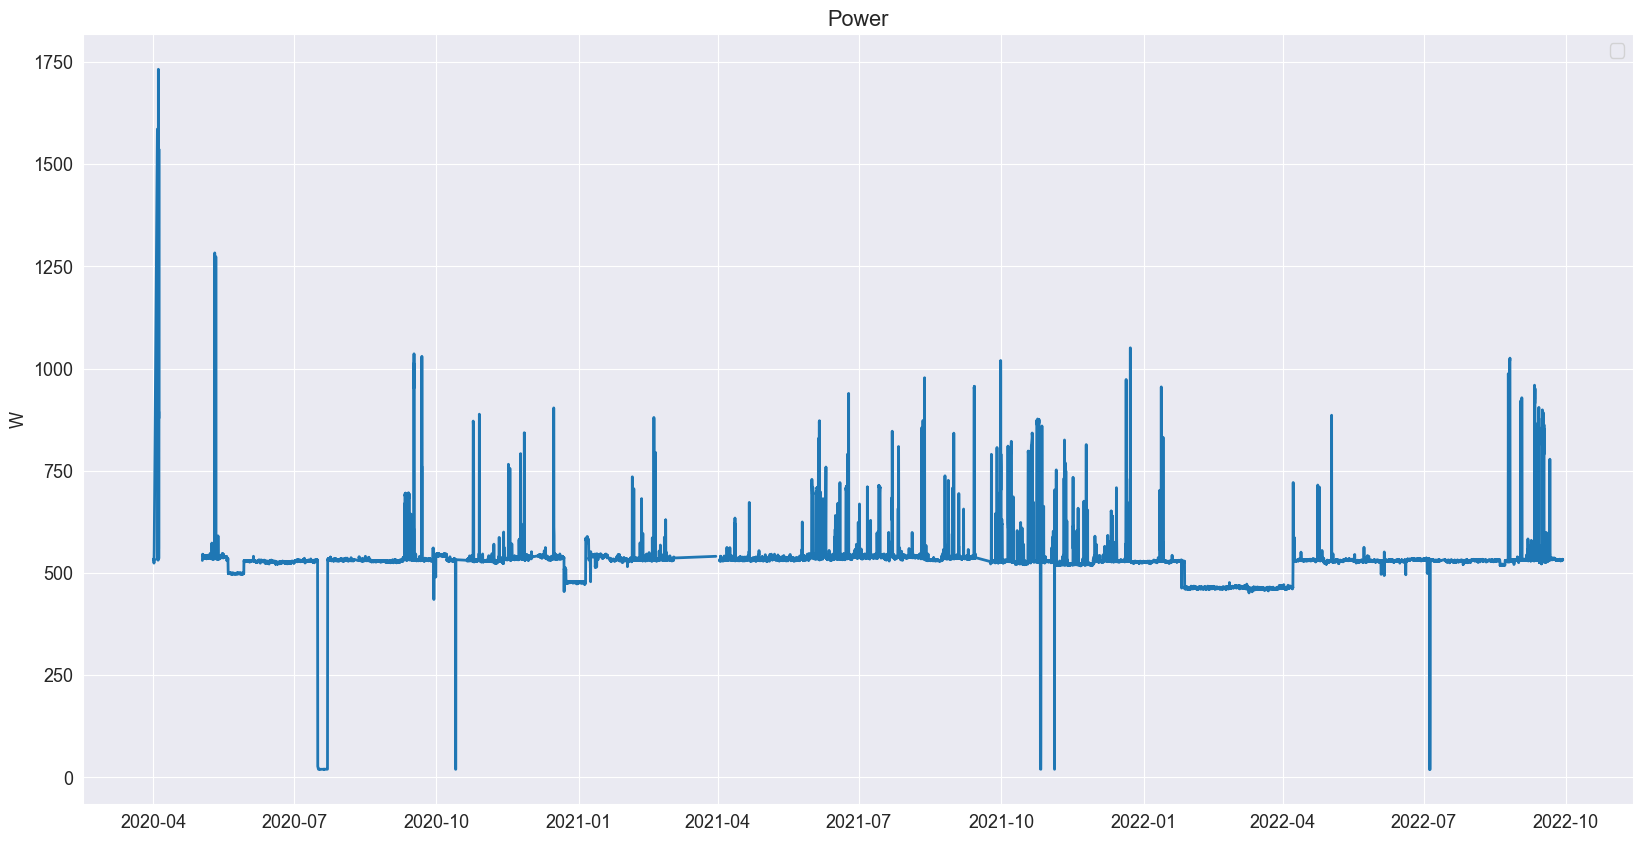

In [16]:
# Plotting specific nodes in time
#showplot(dataset_P['value']['0'], (20,10)) # 01/21 dataset
showplot(dataset_P['0'], (20,10)) # 2.5 years dataset

<span style="color:red;">WHY ARE THERE EMPTY SPACES IN TIME?</span>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


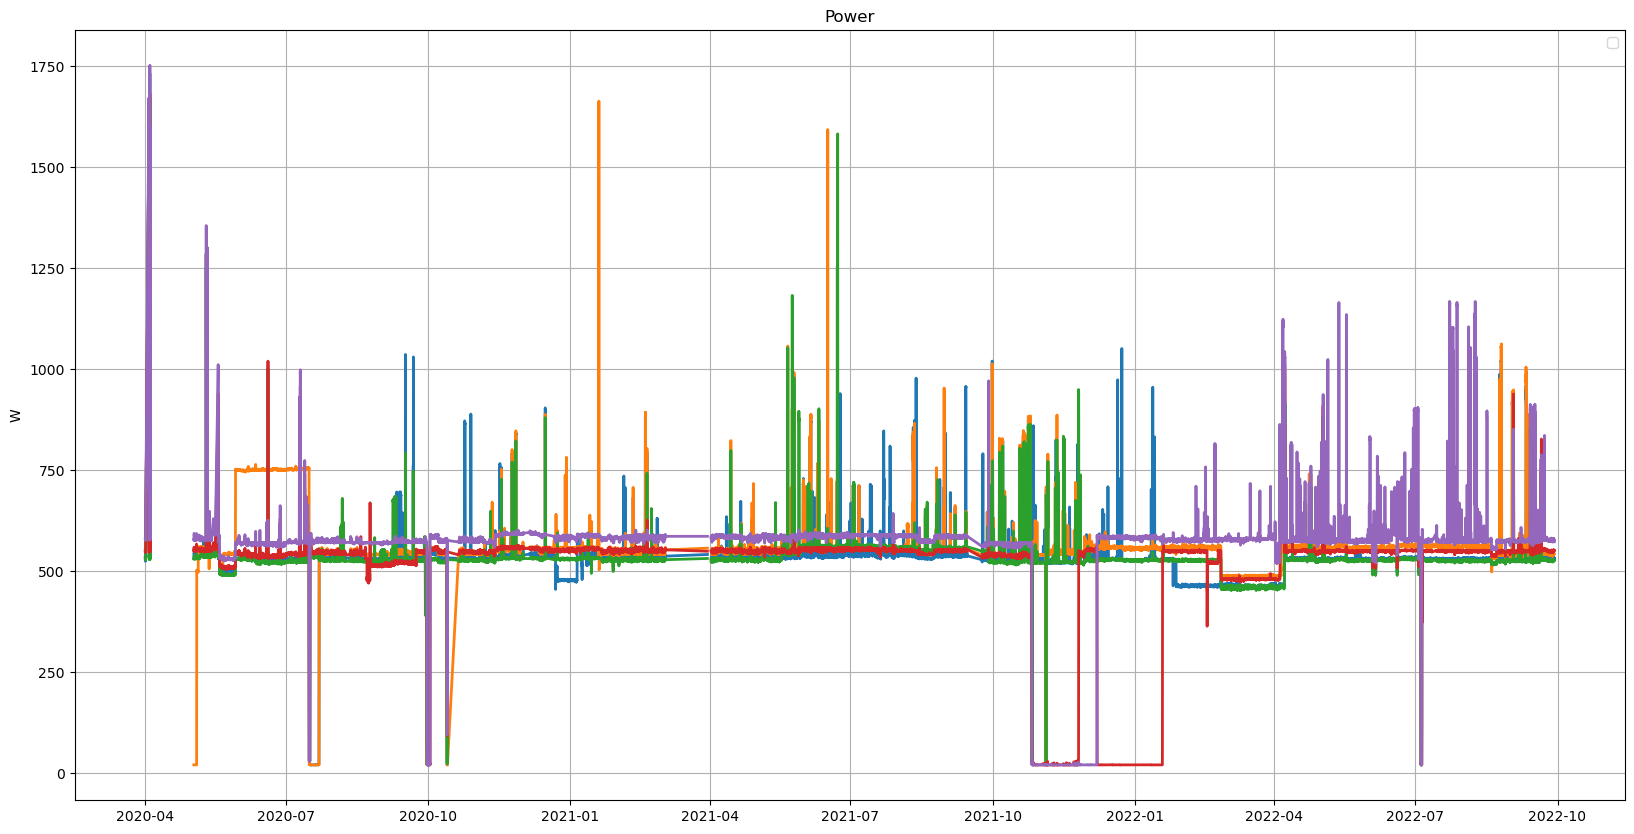

In [8]:
# Plotting a set of nodes in time
#showplot(dataset_P['value'].iloc[:, 0:5], (20,10)) # 01/21 dataset
showplot(dataset_P.iloc[:, 0:5], (20,10)) # 2.5 years dataset

# Plotting a portion in time of the dataset
#showplot(dataset_P.iloc[:1000, 0], (20,10))


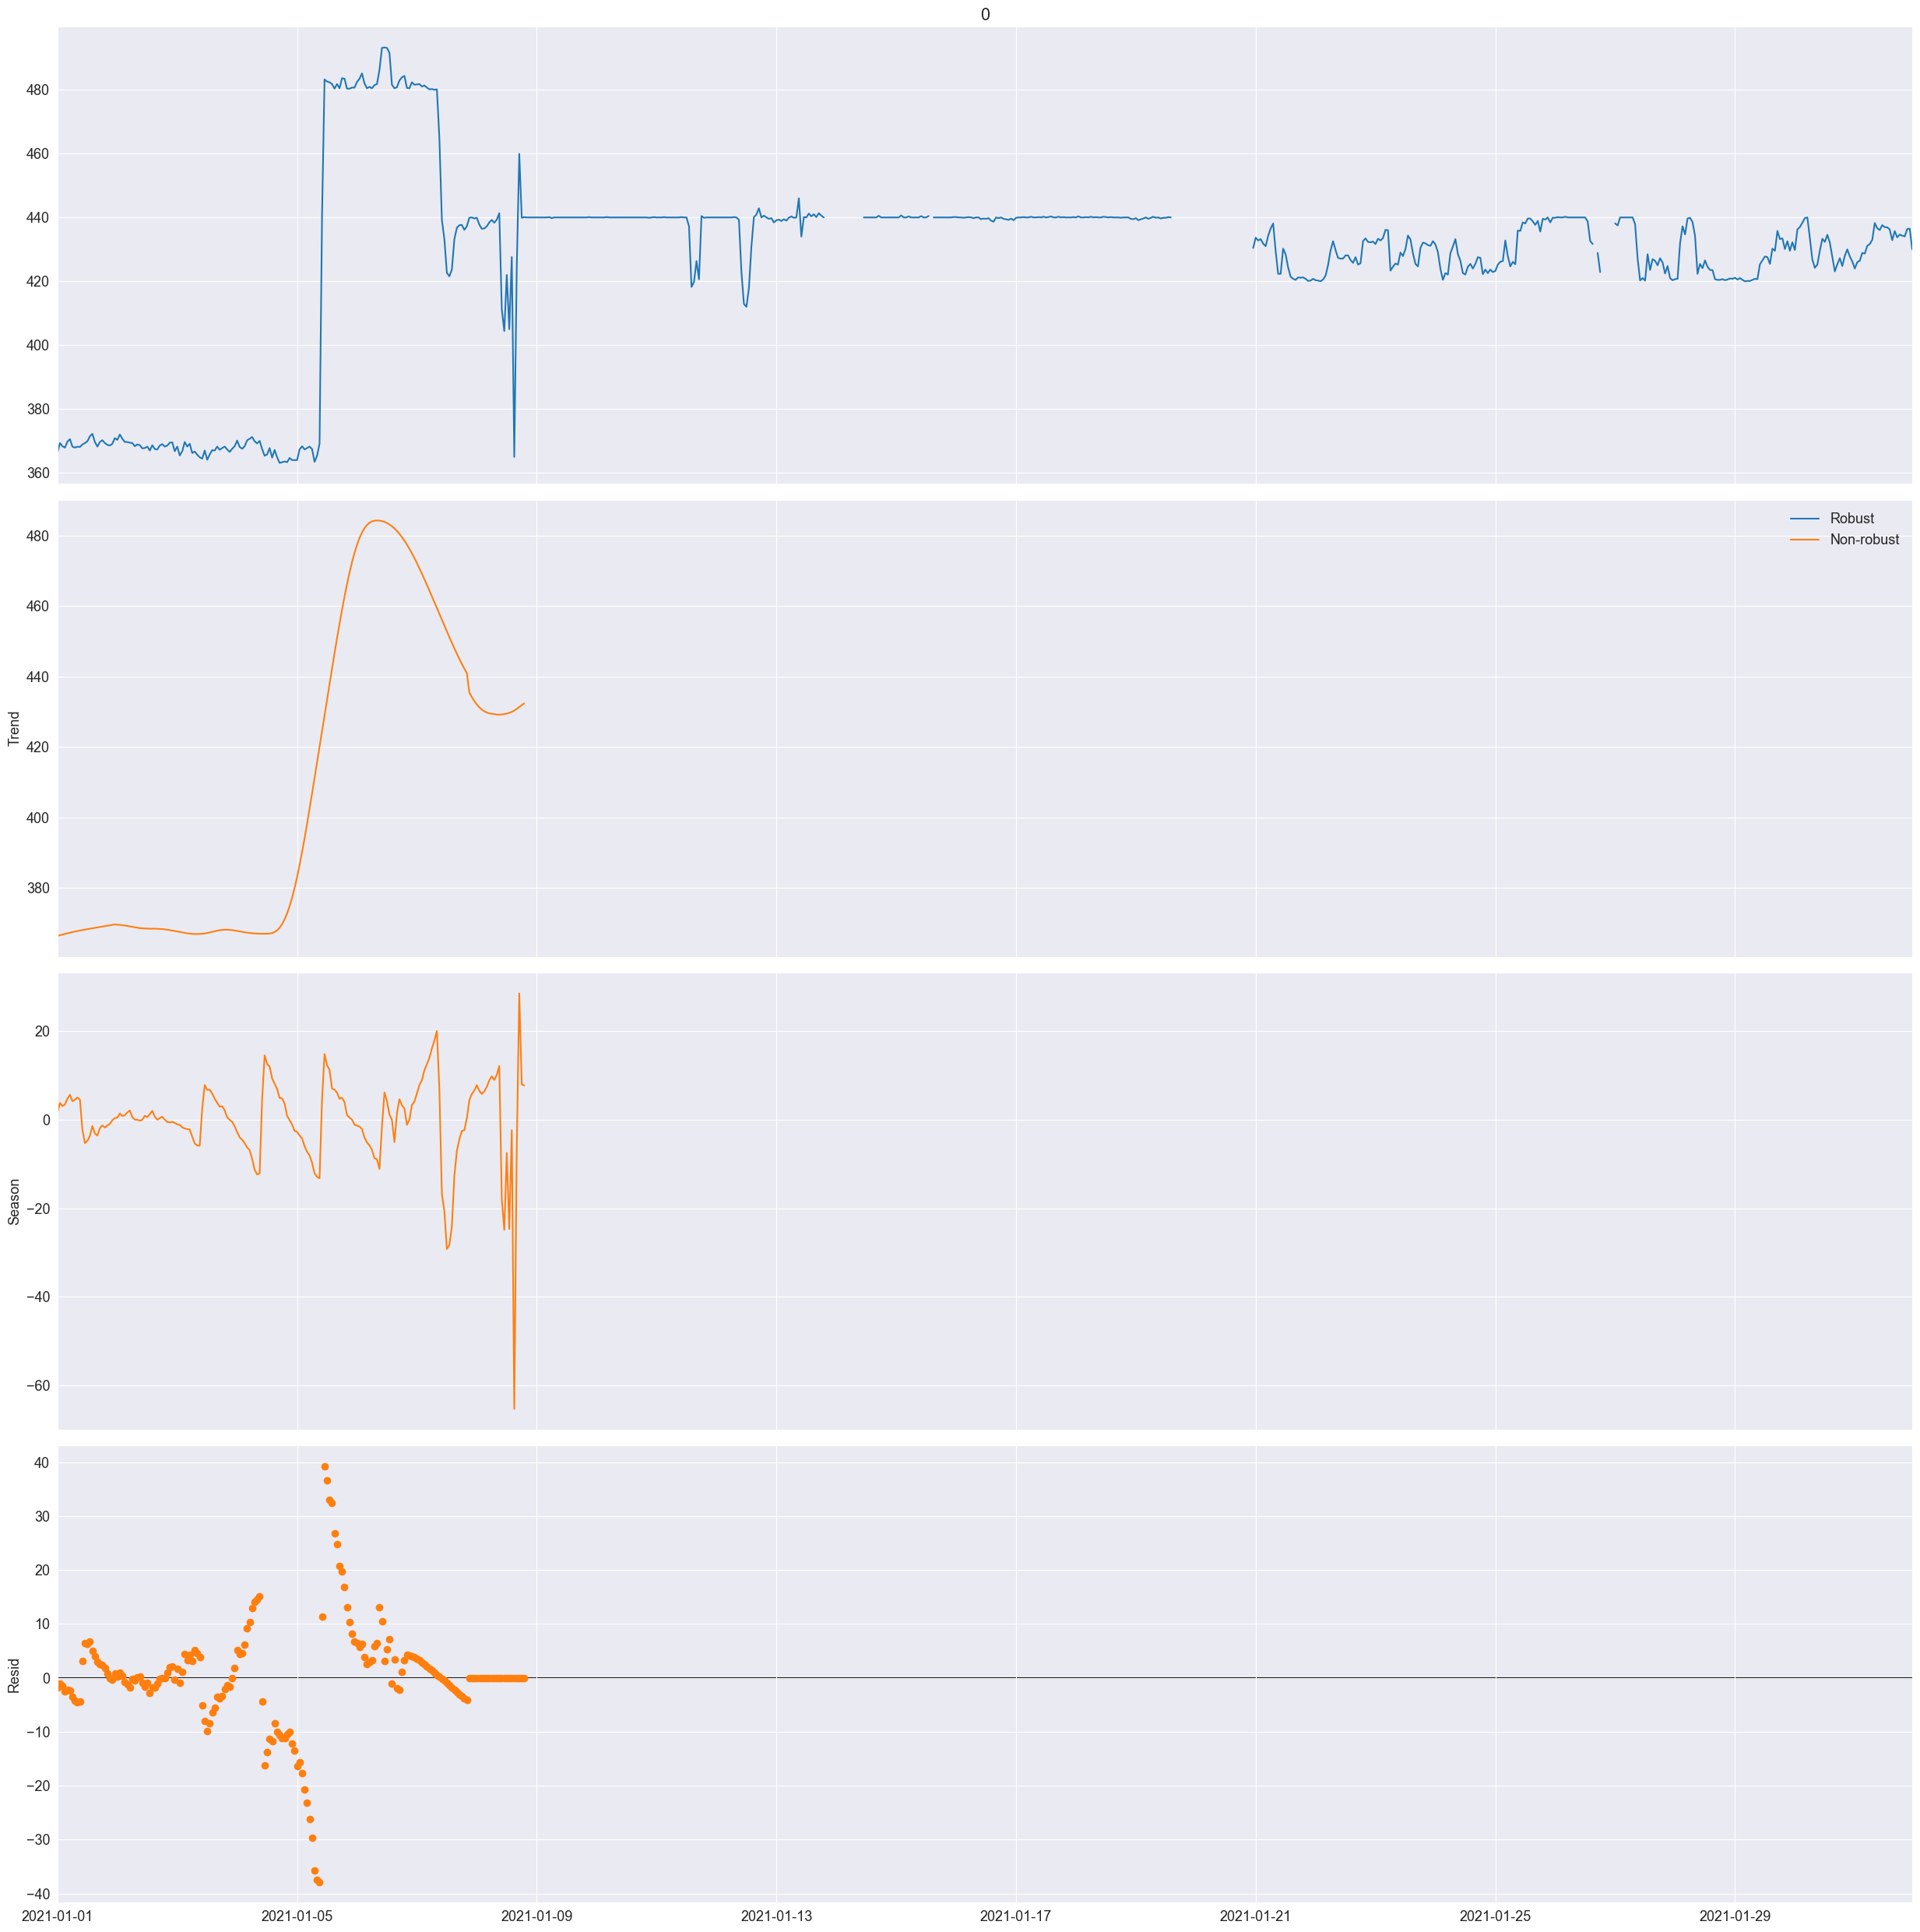

In [14]:
# Seasonal-Trend Decomposition for 01/21 dataset
register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(25, 25))
plt.rc("font", size=13)

def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)

stl = STL(dataset_P['value']['0'], period=24, robust=True)  # the period is set to one day
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(dataset_P['value']['0'], period=24, robust=False).fit()
add_stl_plot(fig, res_non_robust, ["Robust", "Non-robust"])

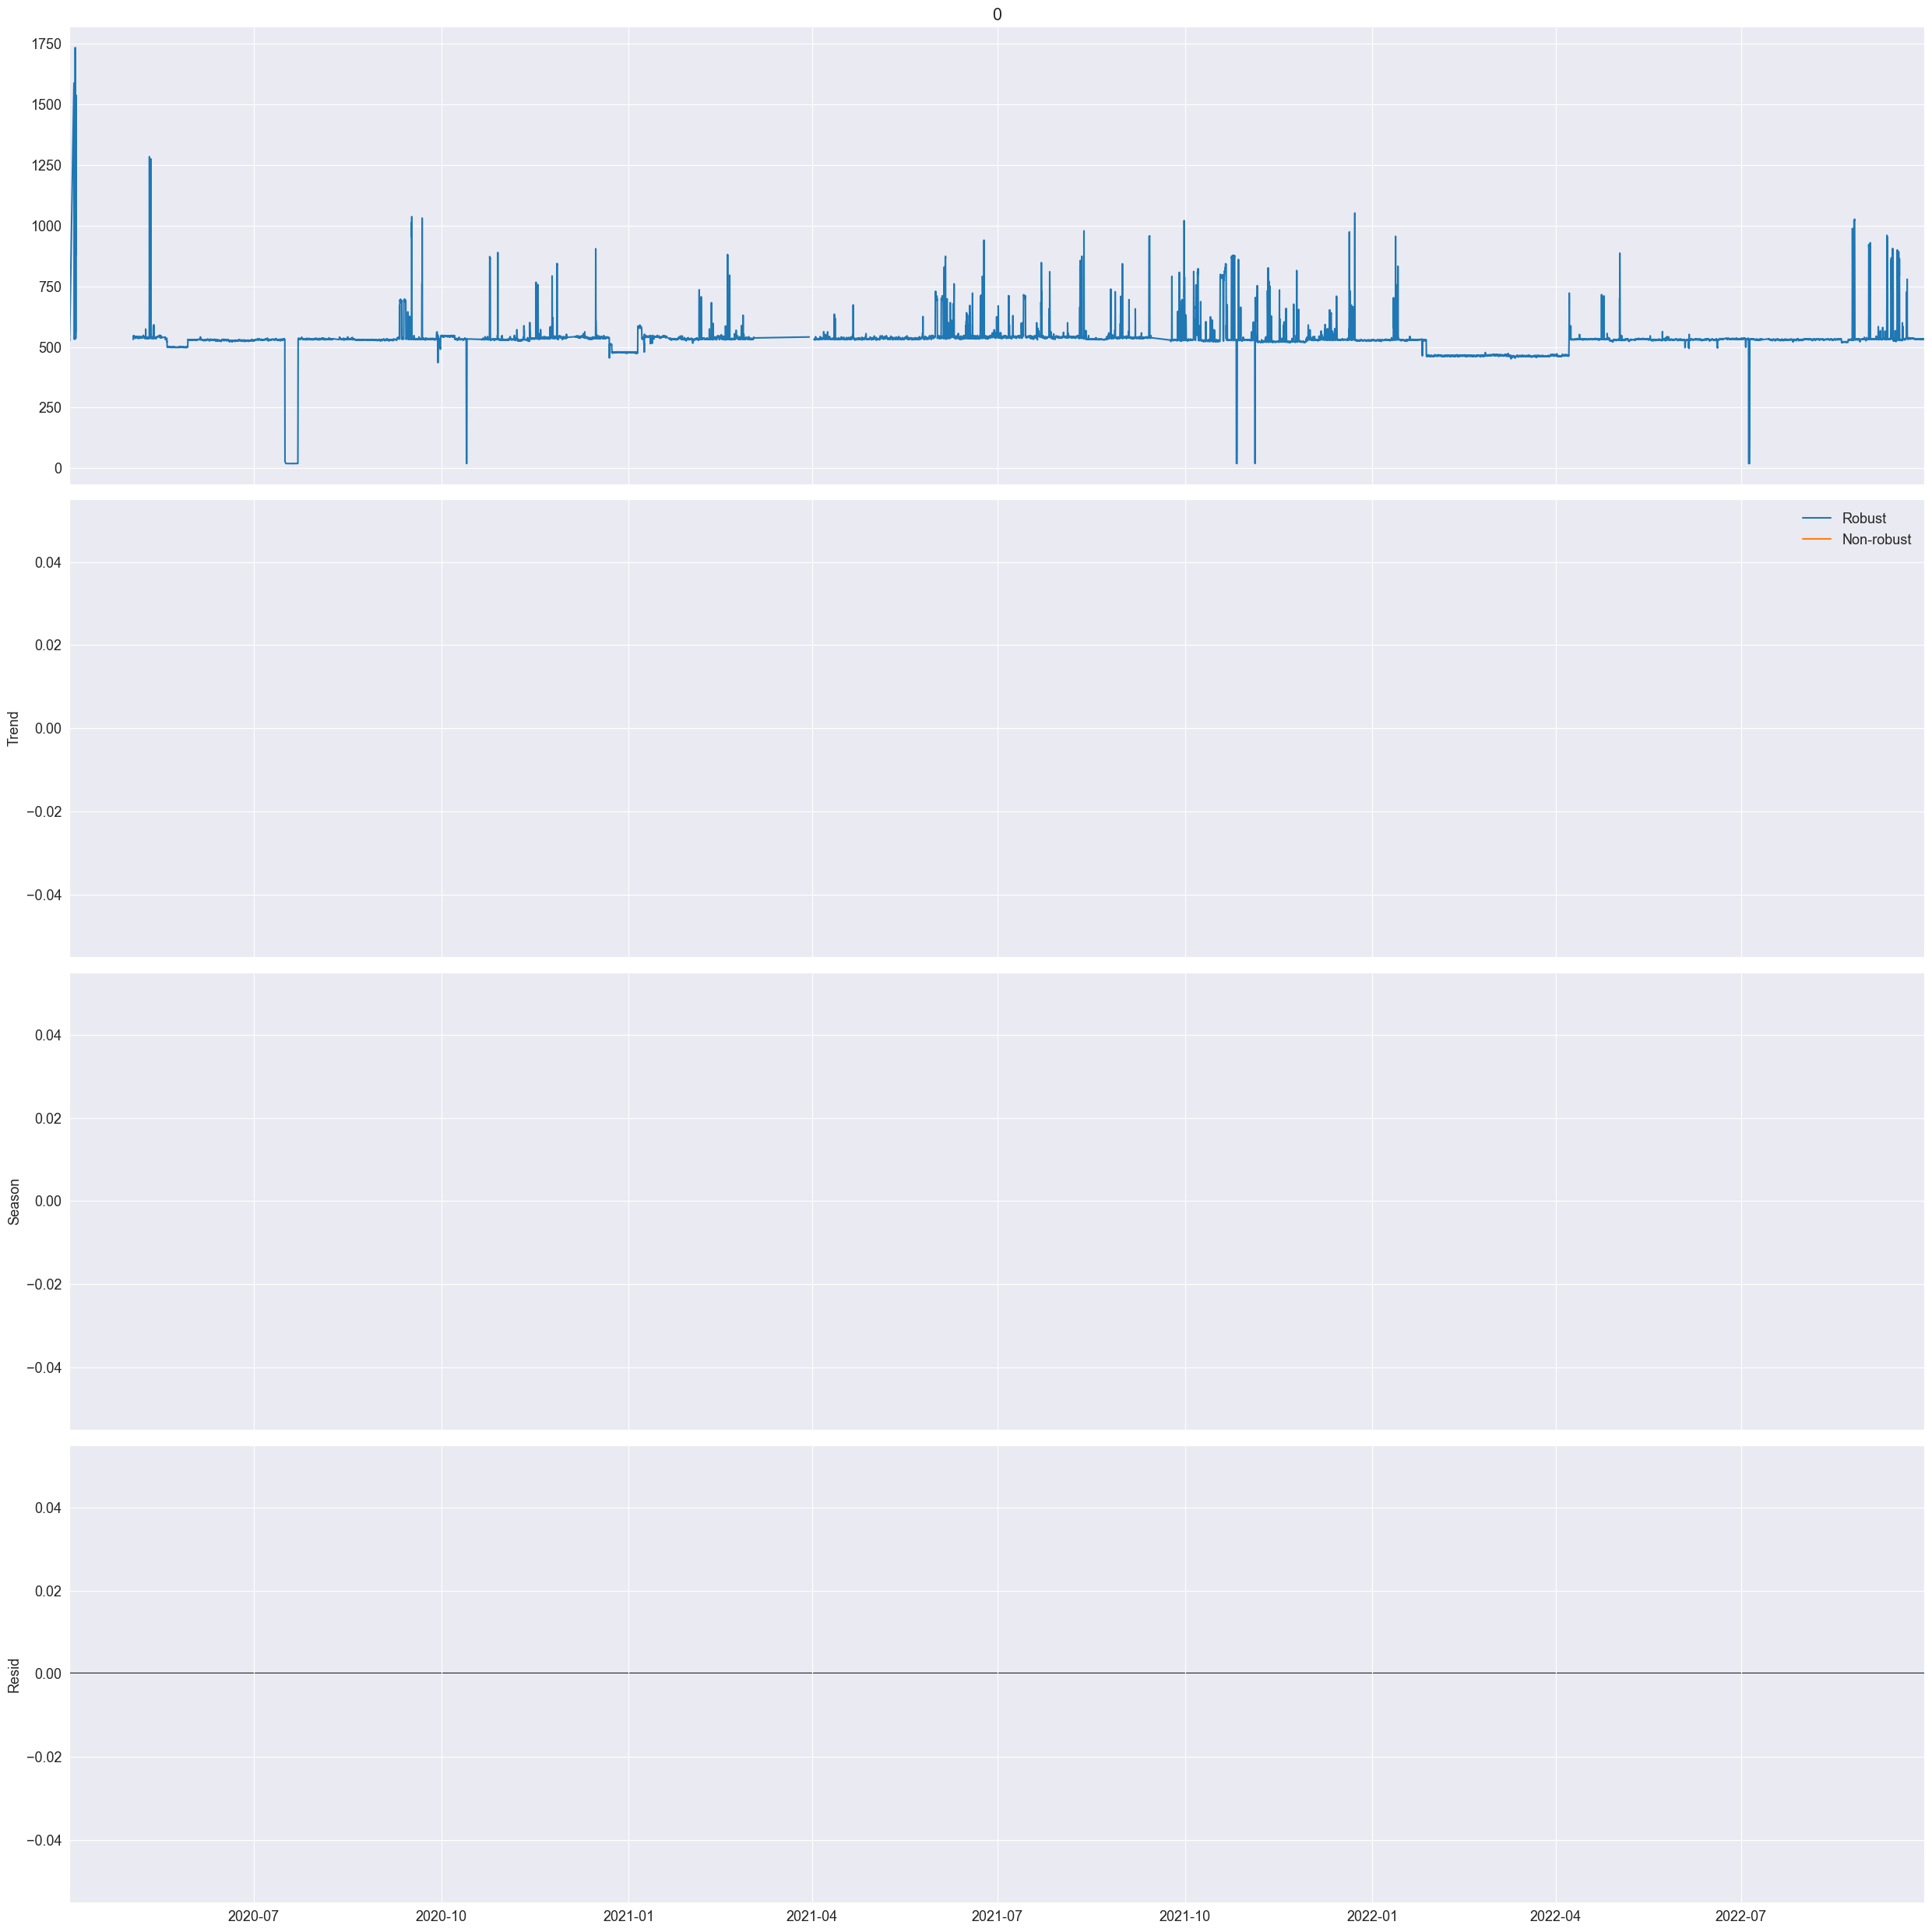

In [17]:
# Seasonal-Trend Decomposition for 2.5 years dataset
register_matplotlib_converters()
sns.set_style("darkgrid")

plt.rc("figure", figsize=(25, 25))
plt.rc("font", size=13)

def add_stl_plot(fig, res, legend):
    """Add 3 plots from a second STL fit"""
    axs = fig.get_axes()
    comps = ["trend", "seasonal", "resid"]
    for ax, comp in zip(axs[1:], comps):
        series = getattr(res, comp)
        if comp == "resid":
            ax.plot(series, marker="o", linestyle="none")
        else:
            ax.plot(series)
            if comp == "trend":
                ax.legend(legend, frameon=False)

stl = STL(dataset_P['0'], period=24, robust=True)  # the period is set to one day
res_robust = stl.fit()
fig = res_robust.plot()
res_non_robust = STL(dataset_P['0'], period=24, robust=False).fit()
add_stl_plot(fig, res_non_robust, ["Robust", "Non-robust"])